# Heart disease

https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython.display import display
%matplotlib inline


# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from common import misc
from common.data_parser import *
from config import *
from heart_helpers import *

plt.style.use("seaborn")

OUT_DIR = "out/"
SET = "multi" #"binary" or "multi"

In [60]:
def print_styling():
    SMALL_SIZE = 14
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [61]:
df = parse_heart_disease("big") if SET=="multi" else parse_heart_disease("sma")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [63]:
num_samples, num_cols = df.shape
num_samples, num_cols
cols = df.columns
feats = cols.drop("target")
feats

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [64]:
from scipy.stats import entropy

def entropy_of_df(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

# Histograms

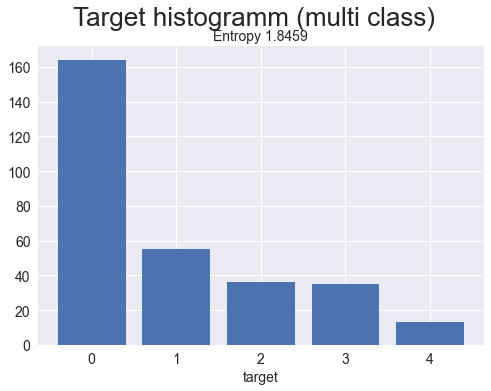

In [66]:
entr = entropy_of_df(df["target"], base=2)

print_styling()
bins = [-0.4,0.4, 0.6, 1.4, 1.6, 2.4, 2.6, 3.4, 3.6, 4.4] if SET=="multi" else [-0.4, 0.4, 0.6, 1.4]
df["target"].hist(bins=bins)
fig = plt.gcf()
ax = plt.gca()
ax.set_xticks((0,1,2,3,4)) if SET=="multi" else ax.set_xticks((0,1))
ax.set_xlabel("target")
fig.suptitle(f"Target histogramm ({SET} class)");
plt.title(f"Entropy {entr:.5}")
plt.savefig(OUT_DIR+f"{SET}_target_hist.pdf")
plt.show();

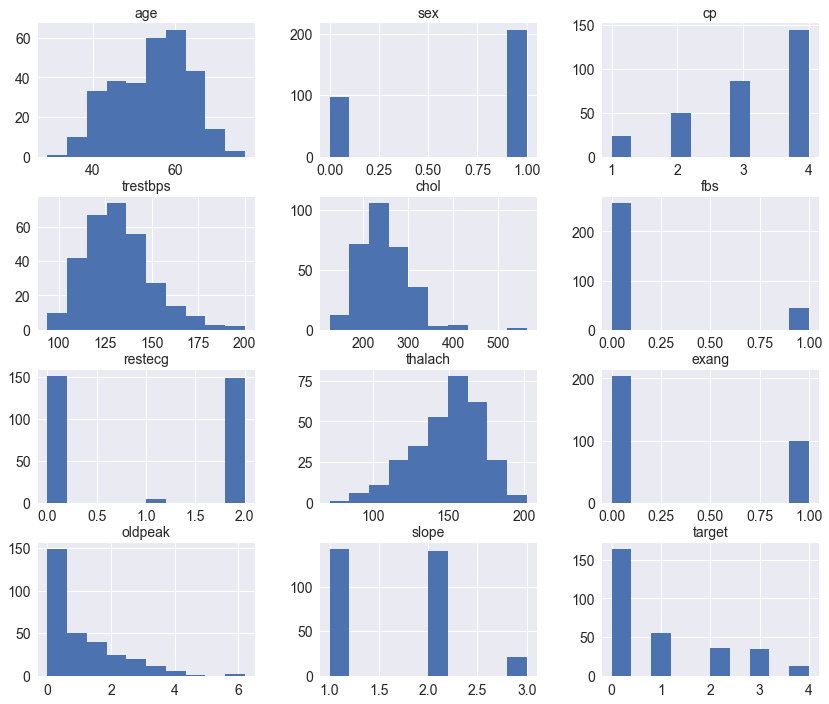

In [67]:
df.hist(figsize=(14,12));

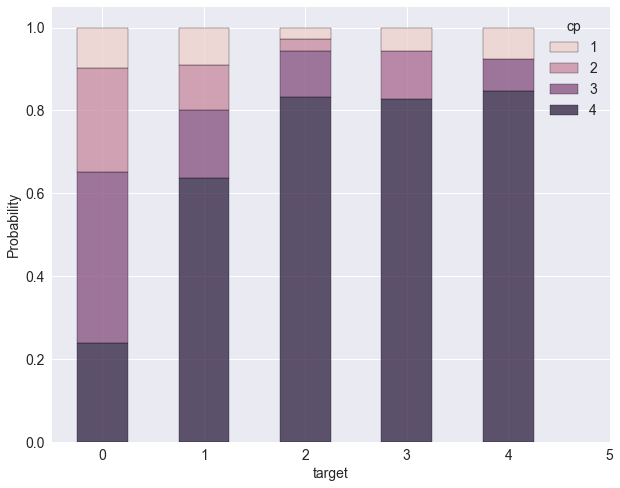

<Figure size 576x396 with 0 Axes>

In [68]:
#mpl.rcParams['legend.facecolor'] = 'white'
var = "probability"

fig, ax = plt.subplots(figsize=(10,8))
for i in [4,3,2,1,0]:
    sns.histplot(data=df[df["target"]==i], x="target", hue="cp", multiple="stack", stat=var, ax=ax, shrink=0.5);
ax.set_xlim(-0.5,5)
plt.show()
plt.clf()


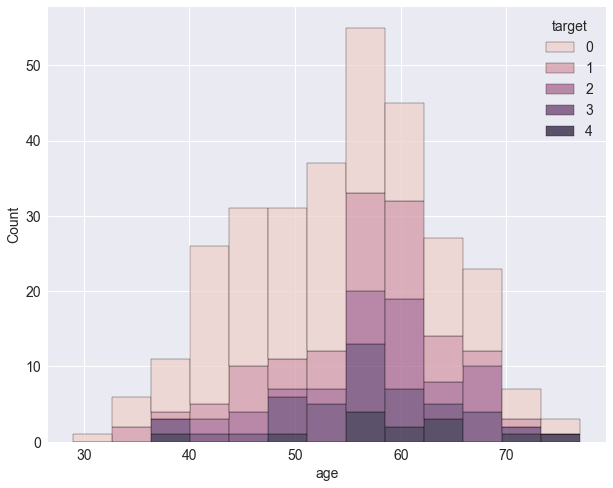

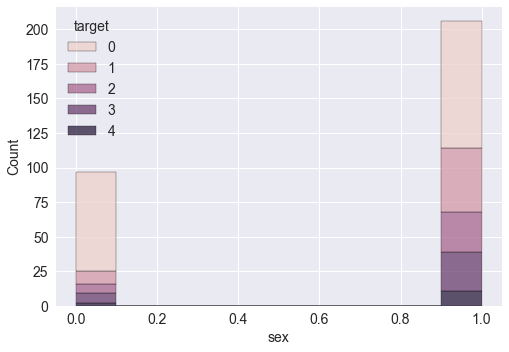

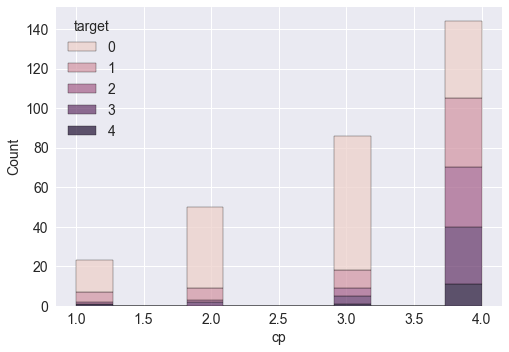

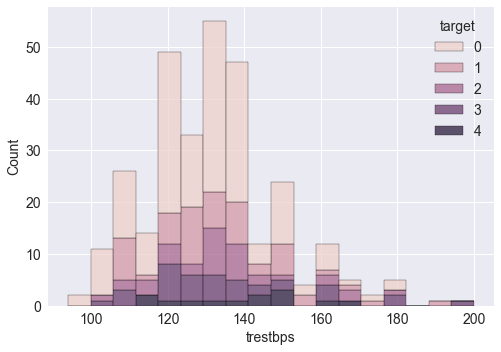

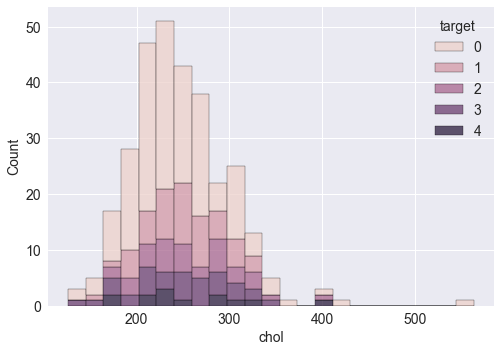

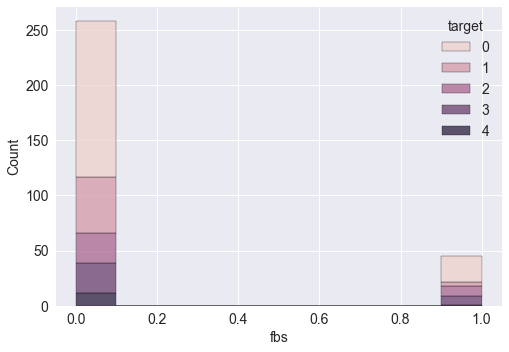

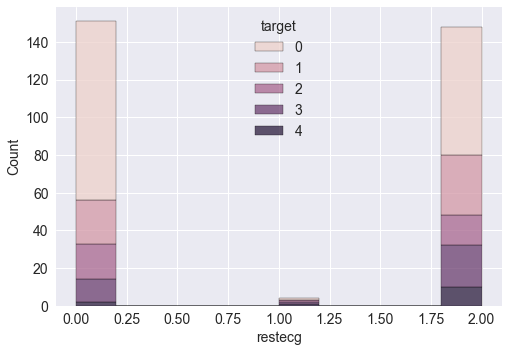

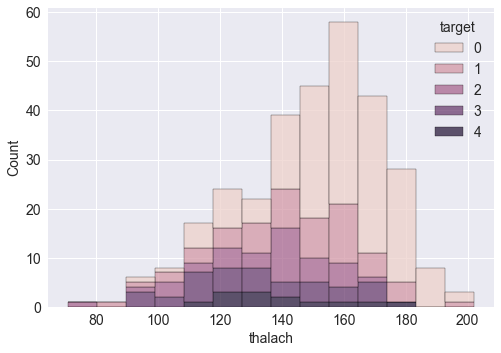

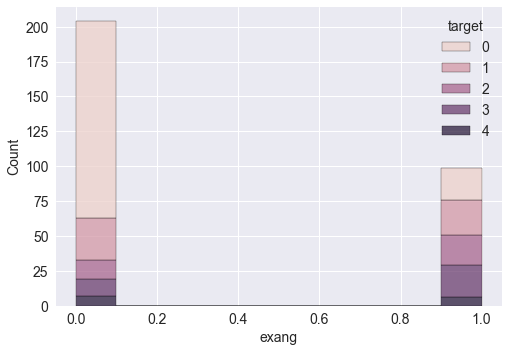

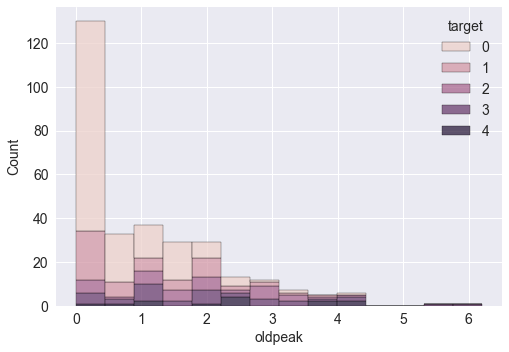

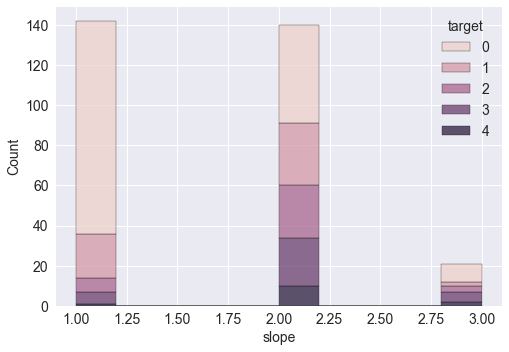

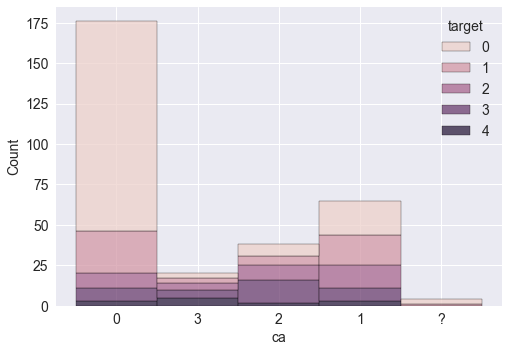

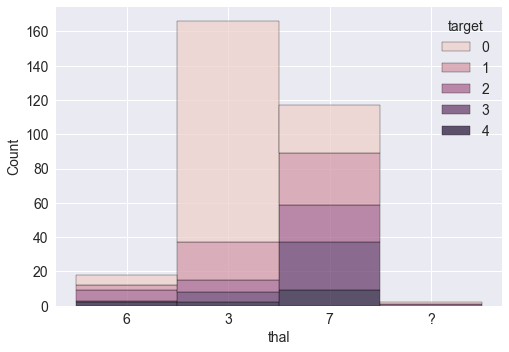

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="target", multiple="stack");
    plt.show()

In [70]:
df_nozero = df[df["target"]!=0]
df_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       139 non-null    int64  
 1   sex       139 non-null    int64  
 2   cp        139 non-null    int64  
 3   trestbps  139 non-null    int64  
 4   chol      139 non-null    int64  
 5   fbs       139 non-null    int64  
 6   restecg   139 non-null    int64  
 7   thalach   139 non-null    int64  
 8   exang     139 non-null    int64  
 9   oldpeak   139 non-null    float64
 10  slope     139 non-null    int64  
 11  ca        139 non-null    object 
 12  thal      139 non-null    object 
 13  target    139 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 16.3+ KB


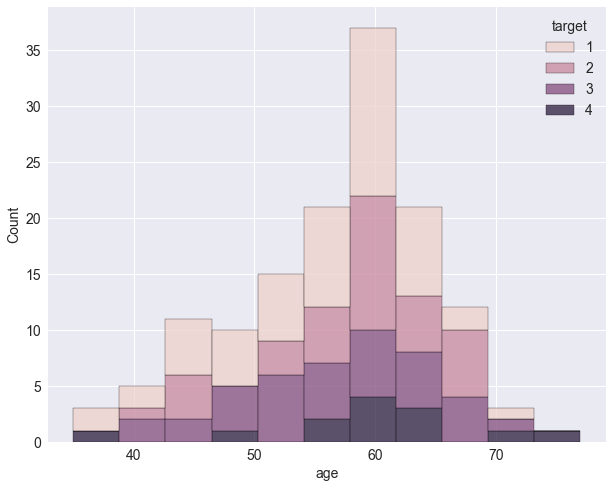

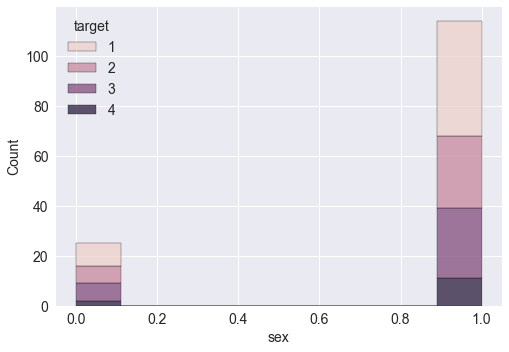

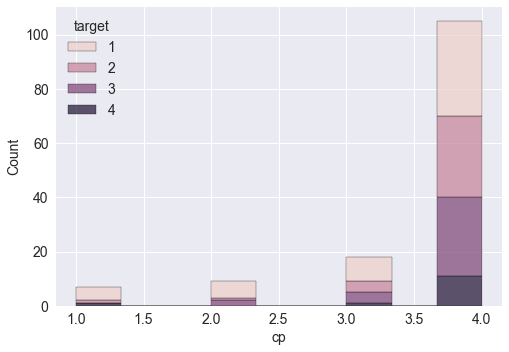

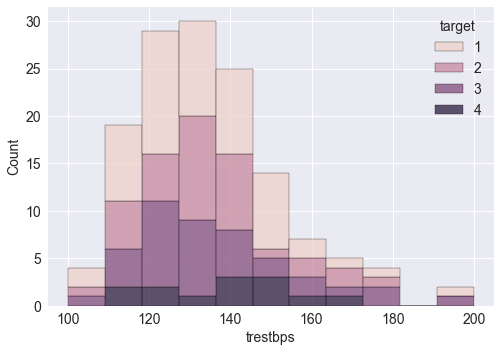

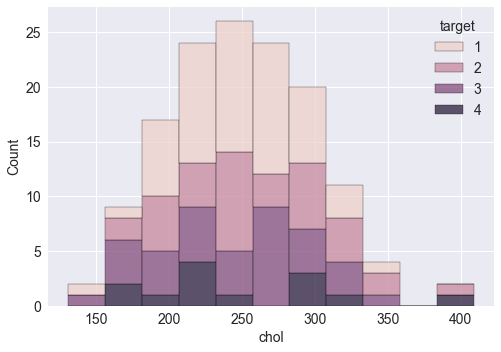

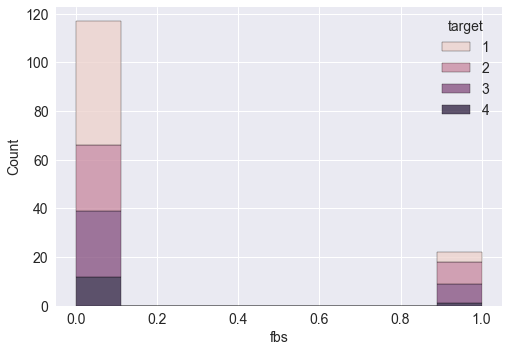

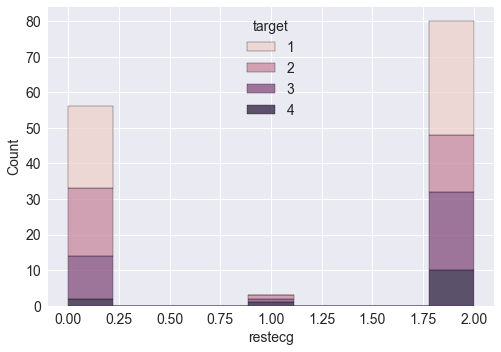

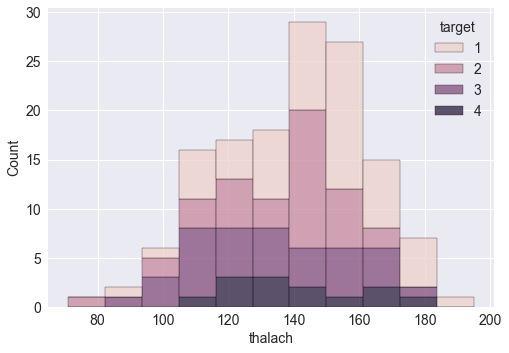

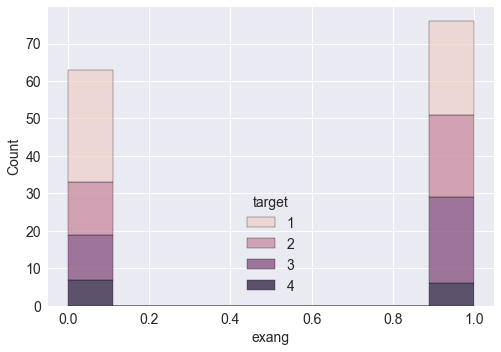

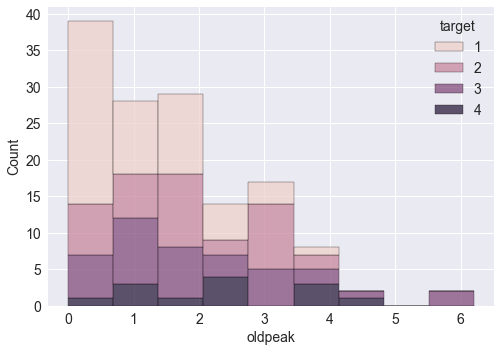

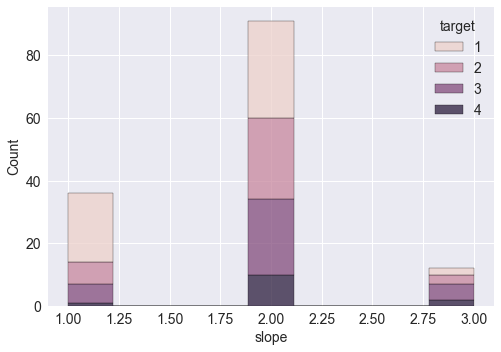

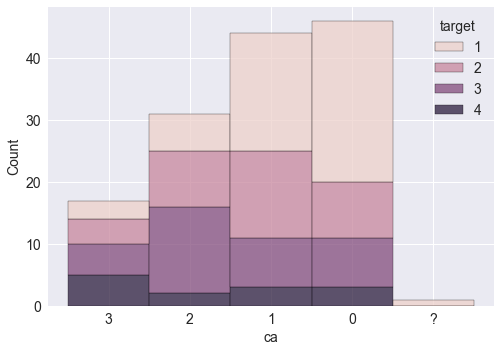

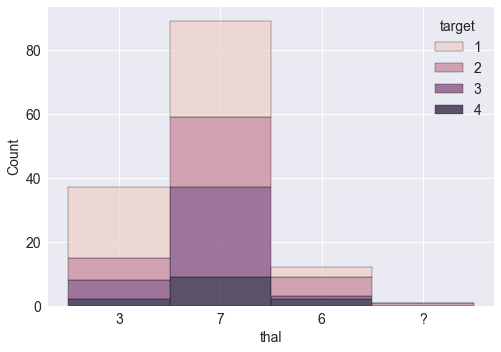

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df_nozero, x=feat, hue="target", multiple="stack");
    plt.show()

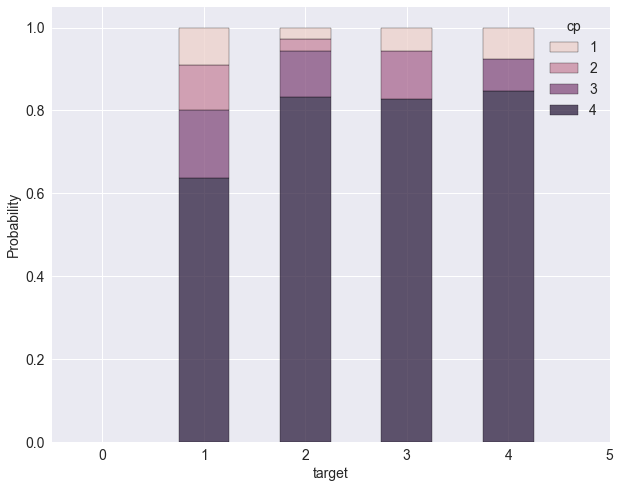

<Figure size 576x396 with 0 Axes>

In [72]:
#mpl.rcParams['legend.facecolor'] = 'white'
var = "probability"

fig, ax = plt.subplots(figsize=(10,8))
for i in [4,3,2,1,0]:
    sns.histplot(data=df_nozero[df_nozero["target"]==i], x="target", hue="cp", multiple="stack", stat=var, ax=ax, shrink=0.5);
ax.set_xlim(-0.5,5)
plt.show()
plt.clf()

# Missing values

At this point, I noticed there actually were some missing values...there are a couple "?"s in the data, but only in 2 different columns

In [73]:
hc = heart_columns()
df_nans = df.replace(to_replace="?", value=np.nan)
df_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [74]:
count_values(df, ["ca"], mode=True,norm=False);
display(hc["ca"])
df[df["ca"] == "?"]

--- ca ---


0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

########################################


'number of major vessels (0-3) colored by flourosopy'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [75]:
count_values(df, ["thal"], mode=True,norm=False);
display(hc["thal"])
df[df["thal"] == "?"]

--- thal ---


3    166
7    117
6     18
?      2
Name: thal, dtype: int64

########################################


'thalium Stress Test Result: 3 = normal; 6 = fixed defect; 7 = reversable defect'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


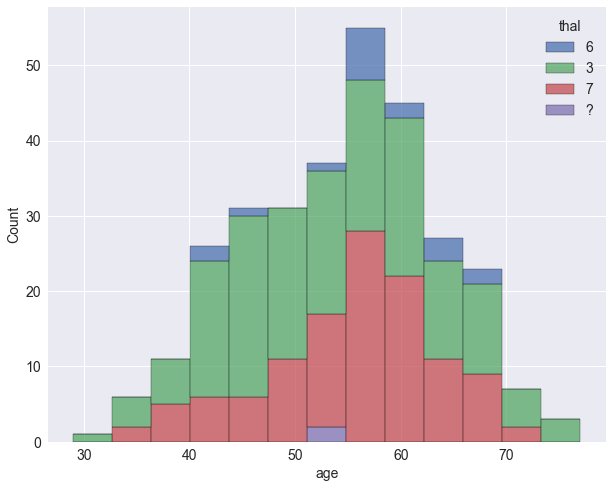

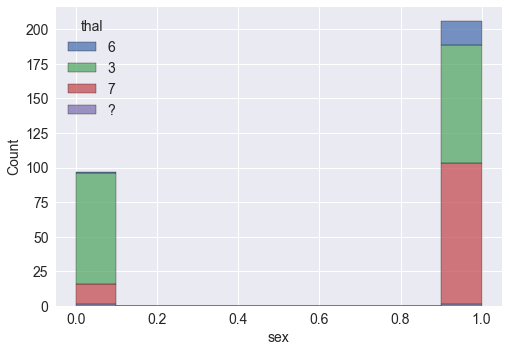

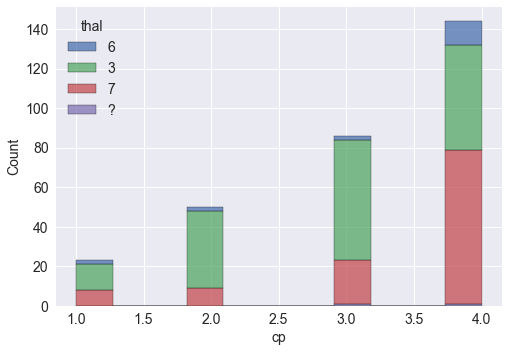

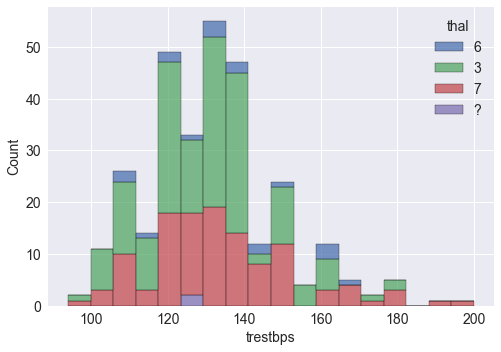

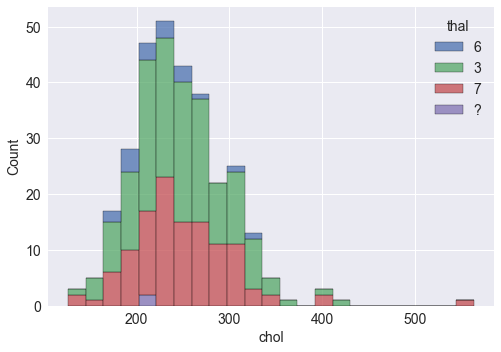

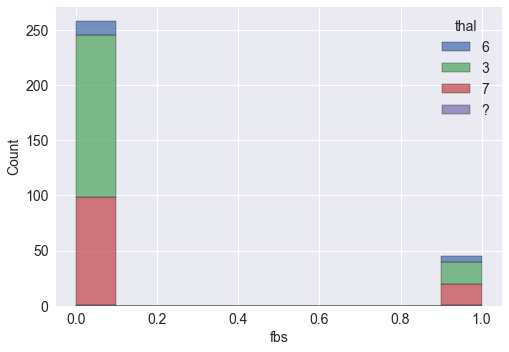

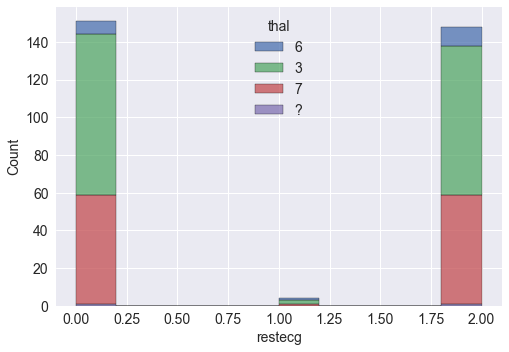

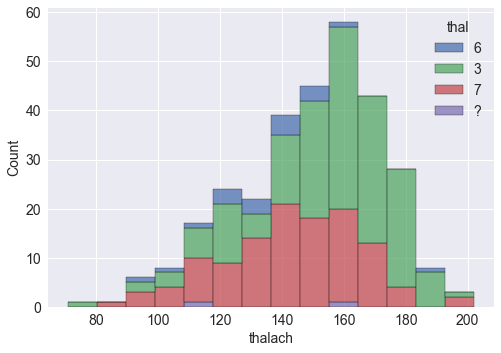

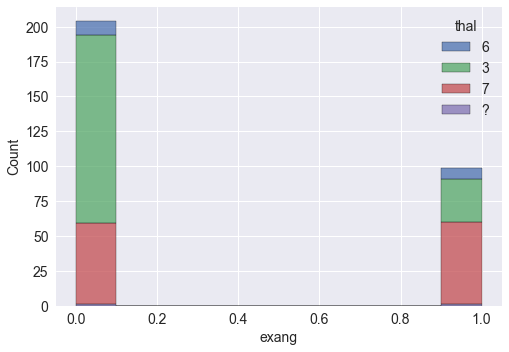

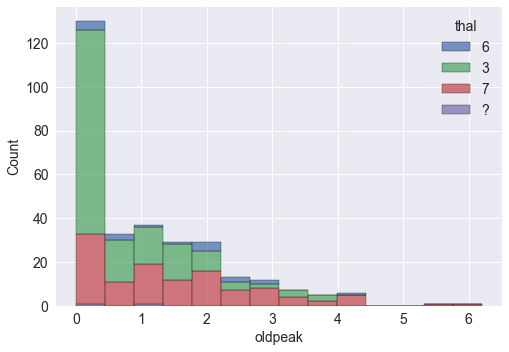

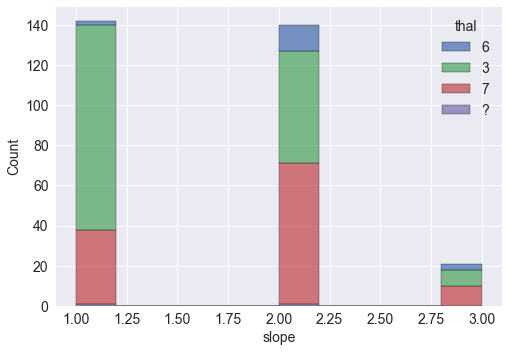

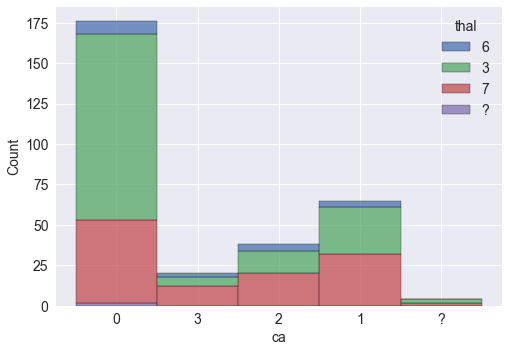

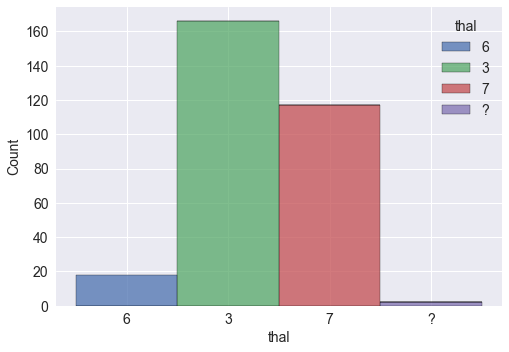

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="thal", multiple="stack");
    plt.show()

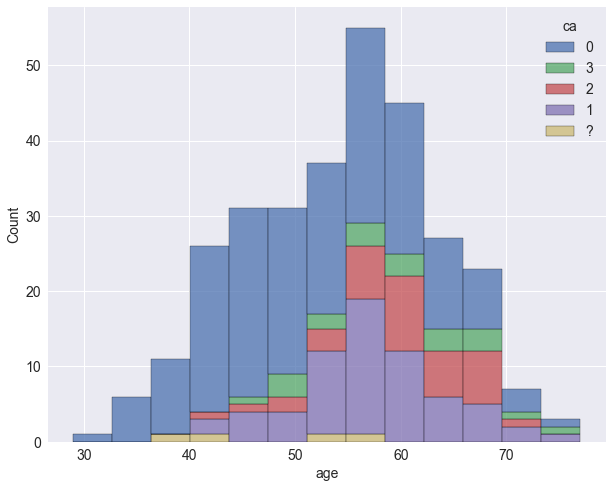

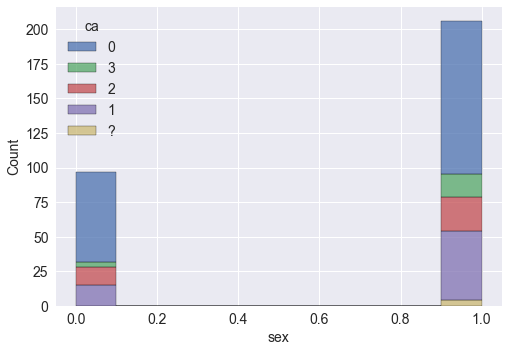

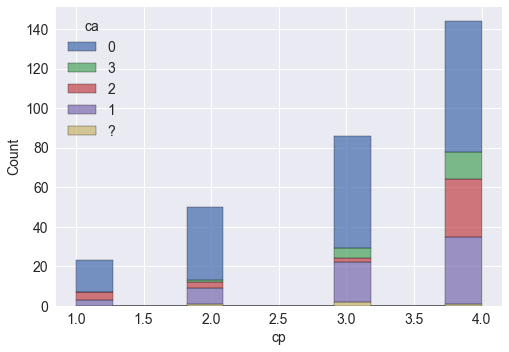

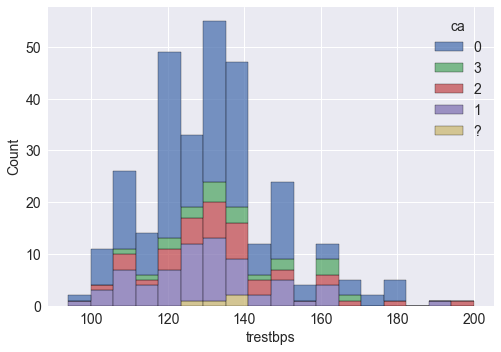

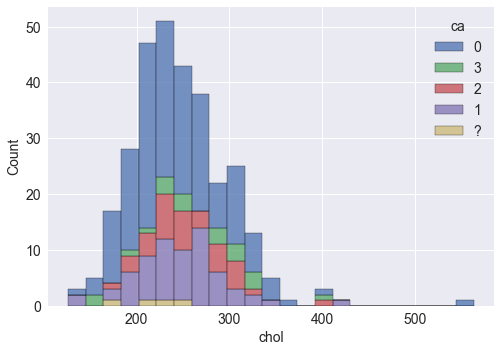

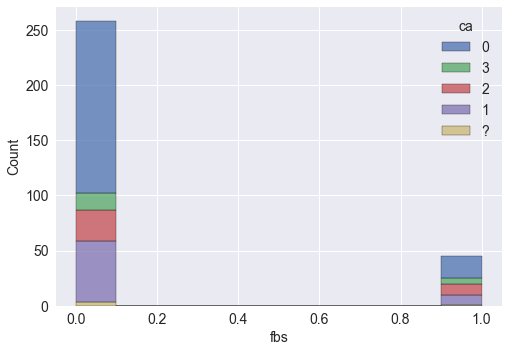

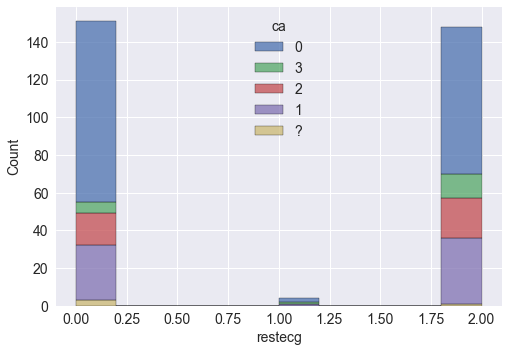

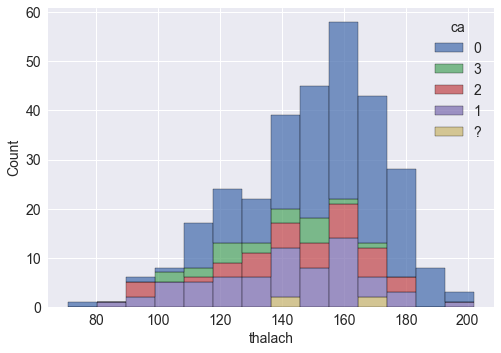

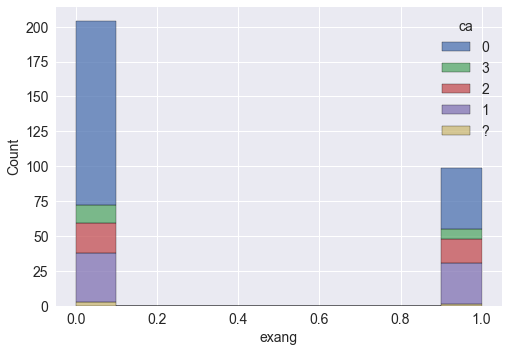

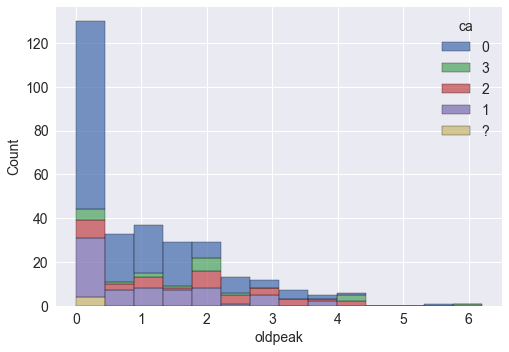

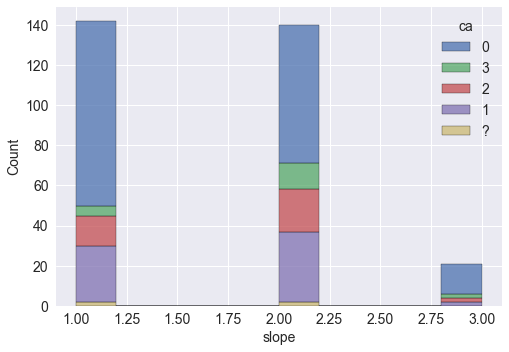

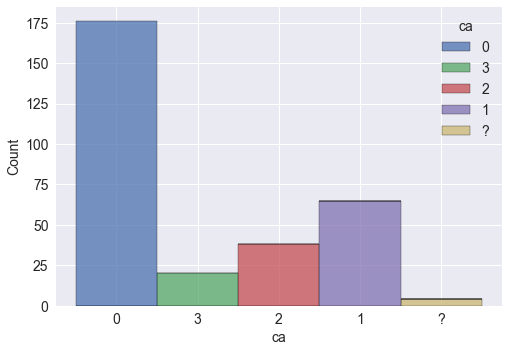

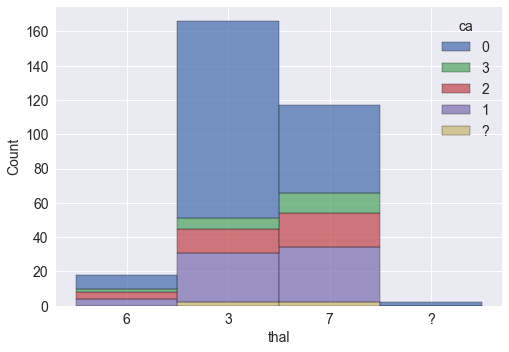

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="ca", multiple="stack");
    plt.show()